# Import Libraries Used

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from mpl_toolkits.mplot3d import Axes3D
from Utilities.plot import histvstarget, distribution

# Import the Data

In [2]:
data_info = pd.DataFrame({
    "Attributes": ["Pregnancies", "Glucose", "BloodPressure", 
              "SkinThickness", "Insulin", "BMI", 
              "DiabetesPedigreeFunction", "Age", "Outcome"],
    "Explanation": ["Number of times pregnant", 
                 "Plasma glucose concentration a 2 hours in an oral glucose tolerance test", 
                 "Diastolic blood pressure (mm Hg)", 
                "Triceps skin fold thickness (mm)", 
                 "2-Hour serum insulin (mu U/ml)",
                 "Body mass index (weight in kg/(height in m)^2)", 
              "Diabetes pedigree function"
                 ,"years",
                   "Diabetes or not"]})

data = pd.read_csv('input/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data_info

,Attributes,Explanation
0,Pregnancies,Number of times pregnant
1,Glucose,Plasma glucose concentration a 2 hours in an o...
2,BloodPressure,Diastolic blood pressure (mm Hg)
3,SkinThickness,Triceps skin fold thickness (mm)
4,Insulin,2-Hour serum insulin (mu U/ml)
5,BMI,Body mass index (weight in kg/(height in m)^2)
6,DiabetesPedigreeFunction,Diabetes pedigree function
7,Age,years
8,Outcome,Diabetes or not


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploring the Data

## Missing values

In [5]:
data.isnull().sum() # Number of missing values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values, it seems.

## Outcome

Number of negative outcomes 268
Number of positive outcomes 500


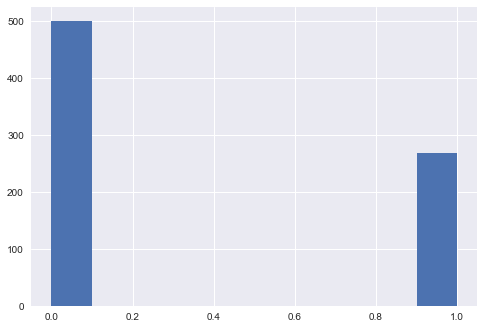

In [6]:
plt.hist(data["Outcome"])
print("Number of negative outcomes",np.count_nonzero(data["Outcome"]))
print("Number of positive outcomes",len(data["Outcome"])-np.count_nonzero(data["Outcome"]))

I.e there is nearly twice as many negative outcomes as there is positive in the dataset.

## Pregnancies

### Distribution

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

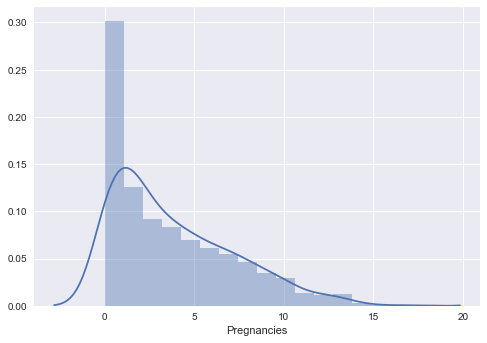

In [7]:
distribution("Pregnancies", data)
data["Pregnancies"].describe()

Distribution is positively skewed. Looks exponential.

### Relationship to outcome

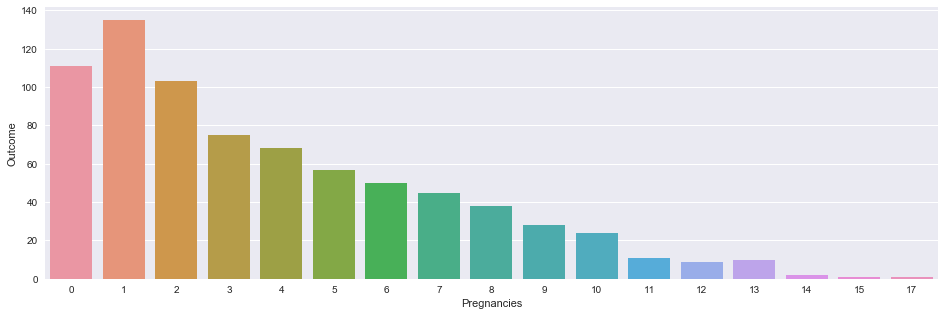

In [8]:
histvstarget("Pregnancies", "Outcome",data)

The outcome of diabetes seems to decrease with number of pregnancies.

## Glucose

### Distribution

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

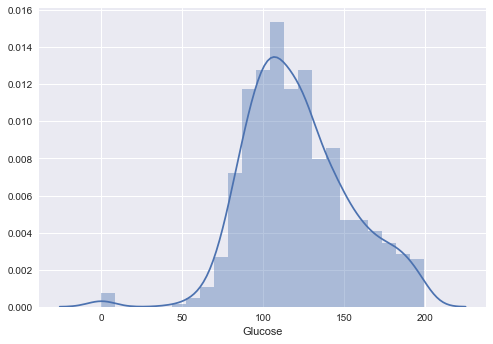

In [9]:
distribution("Glucose", data)
data["Glucose"].describe()

Again positively skewed with outliers to the left, resembles the normal distribution. Those zeros might be missing values, a Glucose concentration of 0 is unrealistic. Lets mark them with NaN instead.

In [10]:
data["Glucose"] = data["Glucose"].replace(0, np.nan)
data["Glucose"].isnull().sum() # Number of missing values.

5

### Relationship to outcome

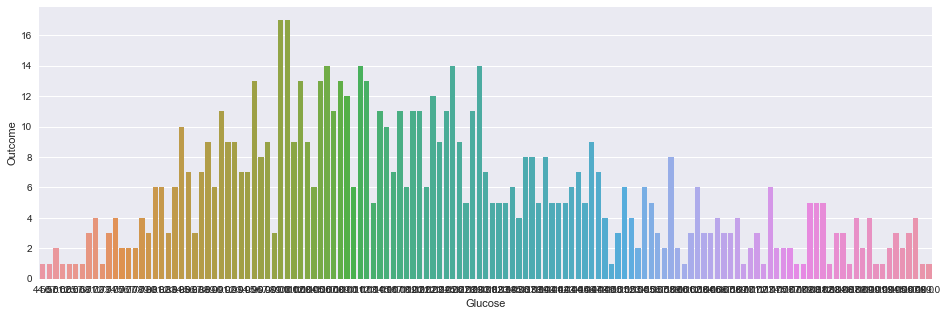

In [11]:
histvstarget("Glucose", "Outcome",data)

High variance with some kind of center of mass to the left, can't draw any conclusion by eye.

## BloodPressure

### Distribution

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

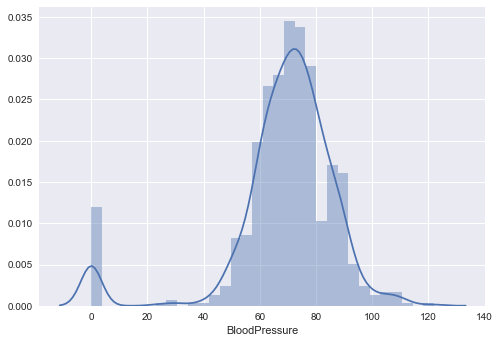

In [12]:
distribution("BloodPressure", data)
data["BloodPressure"].describe()

Looks fairly normal but Bloodpressures of 0 occurs. This is a missing value, lets mark it with a NaN instead.

In [13]:
data["BloodPressure"] = data["BloodPressure"].replace(0, np.nan)
data["BloodPressure"].isnull().sum() # Number of missing values.

35

### Relationship to outcome

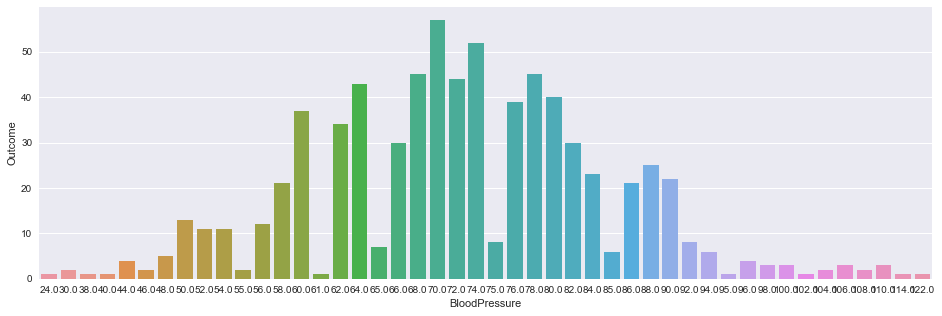

In [14]:
histvstarget("BloodPressure", "Outcome",data)

Center of mass towards the middle.

 ## SkinThickness

### Distribution

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

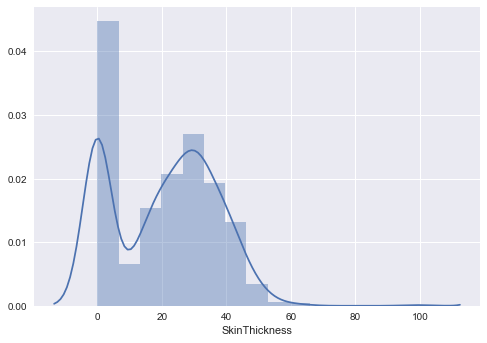

In [15]:
distribution("SkinThickness", data)
data["SkinThickness"].describe()

Again we are encountered with 0 values, a value of 0 skin thickness is not realistic. Replace it with NaN.

In [16]:
data["SkinThickness"] = data["SkinThickness"].replace(0, np.nan)
data["SkinThickness"].isnull().sum() # Number of missing values.

227

### Relationship to outcome

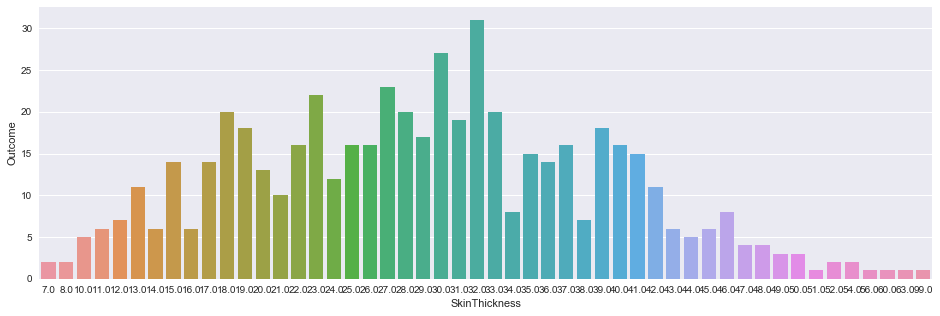

In [17]:
histvstarget("SkinThickness", "Outcome",data)

Center of mass towards the middle but with large variation. 

## Insulin

### Distribution

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

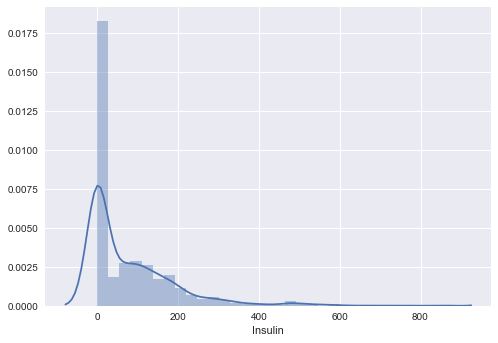

In [18]:
distribution("Insulin", data)
data["Insulin"].describe()

Again we have invalid zero values, replace with NaN.

In [19]:
data["Insulin"] = data["Insulin"].replace(0, np.nan)
data["Insulin"].isnull().sum() # Number of missing values.

374

### Relationship to outcome

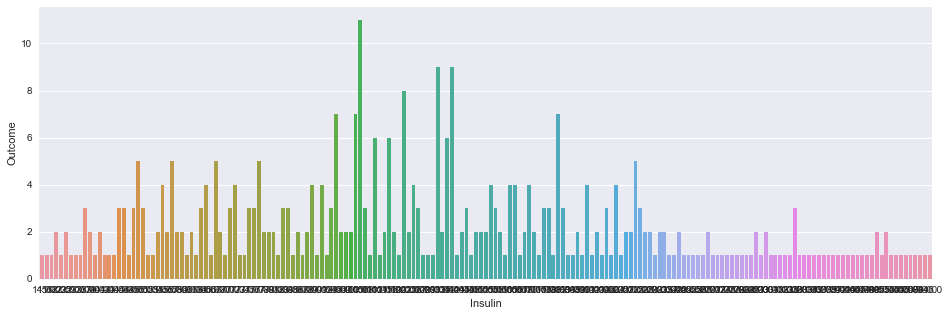

In [20]:
histvstarget("Insulin", "Outcome",data)

Almost completely uniform with some peaks, hard to draw any conclusions.

## BMI

### Distribution

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

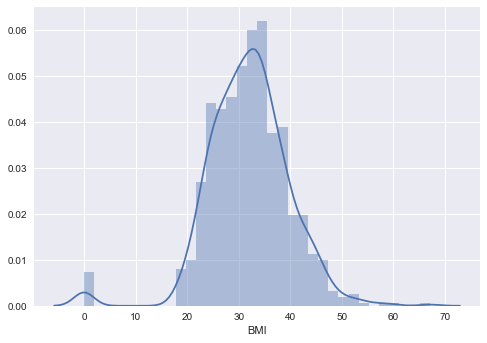

In [21]:
distribution("BMI", data)
data["BMI"].describe()

Missing values. Replace with NaN.

In [22]:
data["BMI"] = data["BMI"].replace(0, np.nan)
data["BMI"].isnull().sum() # Number of missing values.

11

### Relationship to outcome


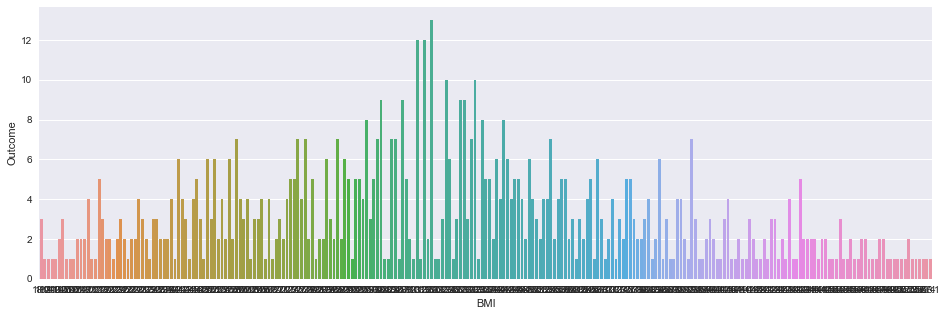

In [23]:
histvstarget("BMI", "Outcome",data)

Uniform with some peaks, some kind of center of mass towards the middle.

## DiabetesPedigreeFunction

### Distribution

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

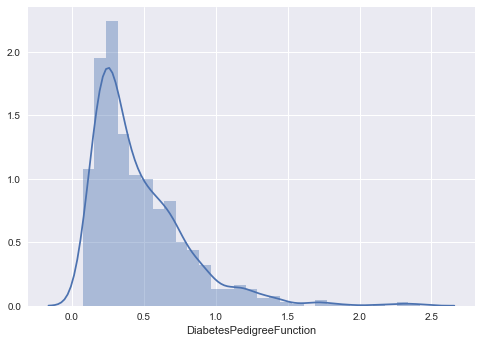

In [24]:
distribution("DiabetesPedigreeFunction", data)
data["DiabetesPedigreeFunction"].describe()

Distribution is positively skewed, and subject to outliers.

### Relationship to outcome

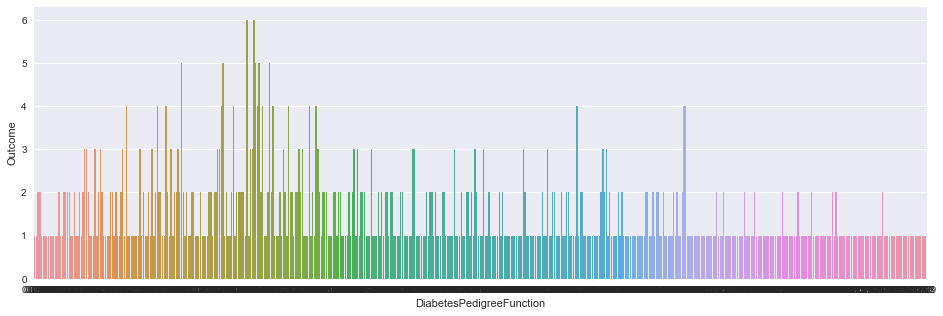

In [25]:
histvstarget("DiabetesPedigreeFunction", "Outcome",data)

Uniform but with some kind of centre of mass towards the left.

## Age

### Distribution

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

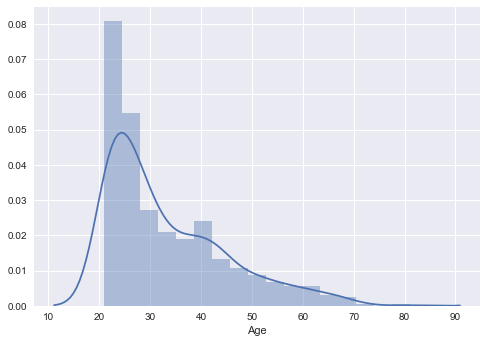

In [26]:
distribution("Age", data)
data["Age"].describe()

Distribution is positively skewed. Looks again exponential-ish

### Relationship to outcome

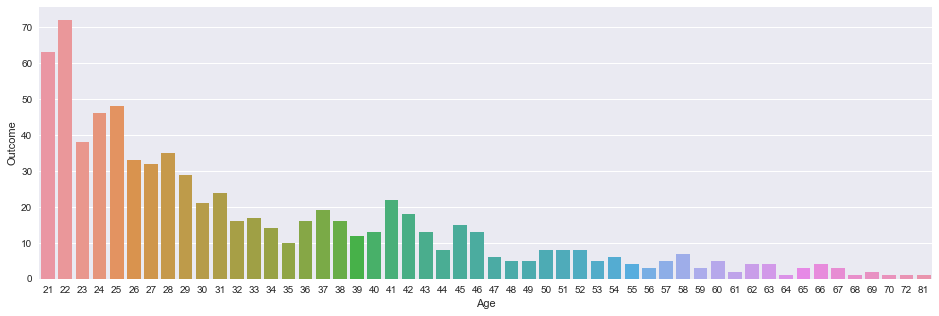

In [27]:
histvstarget("Age", "Outcome",data)

The outcome for diabetes looks more likely if you're younger.

# Correlation

In [28]:
datanoNan = data.dropna(axis=0) # Drop NaN's since not useful.
datanoNan.shape

(392, 9)

Unfortunately we lost a lot of data dropping samples with missing values.

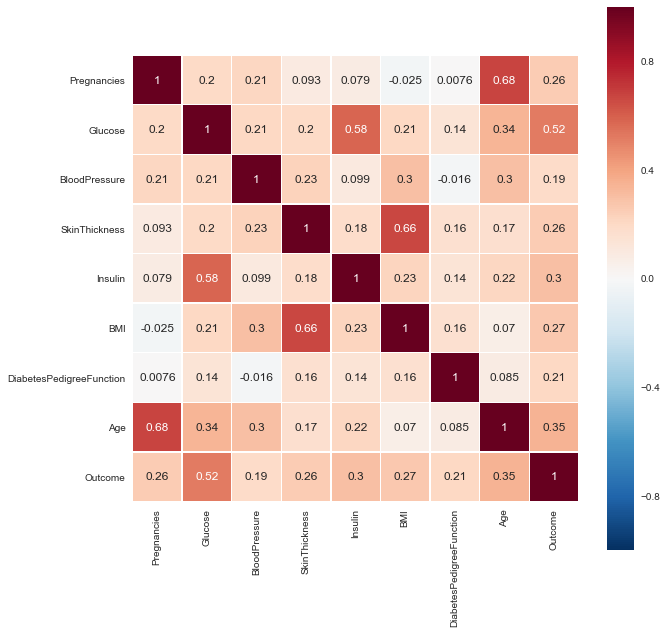

In [29]:
corrmat = datanoNan.corr() # Correlation matrix.
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)
#plt.savefig('Corr_matrix.eps', format='eps', dpi=1000)

We notice high positive correlations between Age and Pregnancies, which is logical. Also between BMI and Skin thickness, Glucose and Insulin as well as Glucose and Outcome.

# Divide the data

Now lets divide the data in to a seperate test set and a train set which we will train our models on. Note that we do this before the attribute selection so that any bias is not introduced. The test set should represent future data.

In [30]:
from sklearn.model_selection import train_test_split
ground_truth = data["Outcome"]
data_temp = data.drop(["Outcome"], axis = 1)
cols = data.columns
x_train, x_test, y_train, y_test = train_test_split(data_temp, ground_truth, test_size=0.1, random_state = 22)
trainingdata = pd.DataFrame(np.hstack((x_train, y_train[:,np.newaxis])), columns = data.columns)
testdata = pd.DataFrame(np.hstack((x_test, y_test[:,np.newaxis])), columns = data.columns)
testdata.to_csv('input/Test.csv', index=False)
print(trainingdata.info())
print(testdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
Pregnancies                 691 non-null float64
Glucose                     686 non-null float64
BloodPressure               659 non-null float64
SkinThickness               487 non-null float64
Insulin                     353 non-null float64
BMI                         681 non-null float64
DiabetesPedigreeFunction    691 non-null float64
Age                         691 non-null float64
Outcome                     691 non-null float64
dtypes: float64(9)
memory usage: 48.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
Pregnancies                 77 non-null float64
Glucose                     77 non-null float64
BloodPressure               74 non-null float64
SkinThickness               54 non-null float64
Insulin                     41 non-null float64
BMI                         76 non-null float64
DiabetesPedigreeFun

# Attribute selection/extraction

Lets have a look at the importance of the attributes features for predicting the outcome. We might be able to remove attributes with a lot of missing values and hence increase our sample-size. We will use two different methods for the selection, one unsupervised attribute extraction that changes the attributes and one supervised attribute selection that don't.

## Standardization

We normalize the data to reduce sensitivity to the scale of attributes. Both logistic regression and KNN is also sensitive to the realitive size between the attributes. In logistic regression the weights will be updated faster for large attributes and a small change in the weights for the large attribute will have an larger impact on the prediction. In KNN we are comparing distances and if one attribute is significantly larger then the others it will dominate the distances. 

In [31]:
datanoNan = trainingdata.dropna(axis=0)
train_y = datanoNan["Outcome"].astype(float)
train_x = datanoNan.drop(["Outcome"], axis=1)
train_x = train_x.apply(lambda x: (x - np.mean(x))/np.std(x)) # Z Standardization
train_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1.418601,-0.467988,0.429160,0.908188,-0.357372,-0.755260,0.306517,-0.001099
2,0.195939,-0.791788,0.429160,-1.347288,-0.874929,-1.426679,-0.891198,-0.965310
4,-0.721057,-0.144188,1.229559,0.908188,0.513437,1.773275,0.789050,-0.193941
8,-0.415391,-1.180348,-1.011559,-1.253310,-0.866714,-0.069555,-1.054915,-0.579626
9,-0.109726,-0.565128,-1.331718,-0.783419,0.004096,-0.326694,-0.693015,-0.676047


## Pricipal component analysis.

In [32]:
import Utilities.mypca as PCA

The cumulative explained variance ratio as a function of the number of PC used:

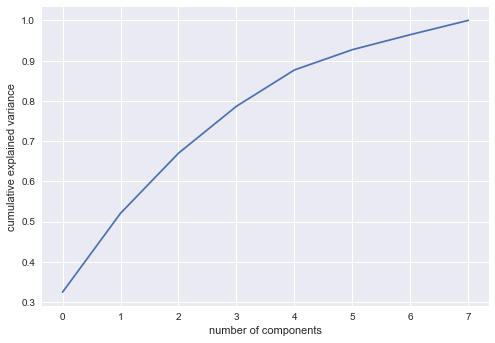

In [33]:
pca = PCA.MyPCA()
pca.fit(train_x)
plt.plot(np.cumsum(pca.explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
#plt.savefig('explained_variance_ratio.eps', format='eps', dpi=1000)

So the first 2 components contain about 66% of the variance. Lets try to plot the outcomes based on the two components.

(351, 2)


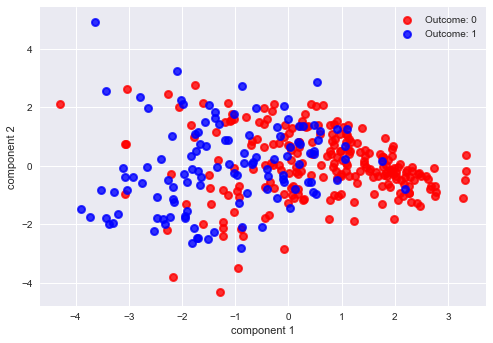

In [34]:
projected = pca.fit_transform(2, train_x)
print(projected.shape)

for color, i, t in zip(['red', 'blue'], [0, 1], train_y,):
    plt.scatter(projected[train_y == i, 0], projected[train_y == i, 1], color=color, alpha=.8, lw=2,
                label= "Outcome: " + str(i))
plt.legend(loc='best', scatterpoints=1)
plt.xlabel('component 1')
plt.ylabel('component 2')

This does separate the data to some degree, but not nearly enough. Instead we choose N=5, that should cover almost 100 percent of the variance.

In [35]:
PCA_projected = pca.fit_transform(5, train_x)

Unfortunately applying PCA mean we are losing the attribute interpretability and we cant remove any concrete attributes. This may also be a problem since we are looking at a possible explanation for diabetes, saying that is depends on combinations of linear combinations of the attrubites can be useful for a doctor. 

## Backward Attribute Elimination

In this method, we start with all n attributes. Then we compute some metric in some model n times, one for all combinations of n-1 attributes. We then look for the attribute which we can drop without making the metric more worse than dropping another. We do this recursevily finally leaving us with one attribute. Since we are not yet making any predictions or trying to build any models we use all of the data.

To be sure to prune of the correct attributes we look at the accuracy using two different classifiers, logistic regression and a k-nearest neighbour classifier (should be fine since our number of dimensions is not that high (curse of dimensionality)).

#### Format of the output of the backward attribute elimination class.
From below:
The first tuple states that using all atributes we get this metric.
Going upwards the other tuples states that if we drop this attribute in addition to all of the above we get this metric. Hence in the last tuple the metric is NaN.

In [36]:
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import Utilities.bfe as bf
bfe = bf.BFE() # Create the backward attribute elimination class.
train_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1.418601,-0.467988,0.429160,0.908188,-0.357372,-0.755260,0.306517,-0.001099
2,0.195939,-0.791788,0.429160,-1.347288,-0.874929,-1.426679,-0.891198,-0.965310
4,-0.721057,-0.144188,1.229559,0.908188,0.513437,1.773275,0.789050,-0.193941
8,-0.415391,-1.180348,-1.011559,-1.253310,-0.866714,-0.069555,-1.054915,-0.579626
9,-0.109726,-0.565128,-1.331718,-0.783419,0.004096,-0.326694,-0.693015,-0.676047


In [37]:
model = LogisticRegression()
bfe.apply(model,accuracy_score,train_x,train_y, loss = False)

[('Glucose', nan),
 ('BMI', 0.75177304964539005),
 ('SkinThickness', 0.75886524822695034),
 ('Pregnancies', 0.78014184397163122),
 ('BloodPressure', 0.80851063829787229),
 ('Insulin', 0.80851063829787229),
 ('Age', 0.8014184397163121),
 ('DiabetesPedigreeFunction', 0.78723404255319152),
 ('All attributes', 0.78014184397163122)]

The importance order is as printed with Glucose as most important and DiabetesPedigreeFunction as the least important attribute. The accuracy get better if we drop DiabetesPedigreeFunction and Age and doesn't really get worse until we also drop Age, Insulin and BloodPressure.

In [38]:
model = KNeighborsClassifier(n_neighbors = 6, p = 2) # K-nearest-neighbour using euclidian distance.
bfe.apply(model,accuracy_score,train_x,train_y,loss = False)

[('Glucose', nan),
 ('Pregnancies', 0.74468085106382975),
 ('BMI', 0.79432624113475181),
 ('SkinThickness', 0.78014184397163122),
 ('Insulin', 0.80851063829787229),
 ('Age', 0.80851063829787229),
 ('BloodPressure', 0.77304964539007093),
 ('DiabetesPedigreeFunction', 0.75886524822695034),
 ('All attributes', 0.76595744680851063)]

The importance order is as printed with Glucose as most important and DiabetesPedigreeFunction as the least important attribute. The accuracy get better if we drop DiabetesPedigreeFunction and BloodPressure and doesn't really get worse until we also drop Insulin and Age.

So if we take the union of the both subsets were the accuracy is best we get the new set: Glucose, Pregnancies, BMI, SkinThickness, Insulin and BloodPressure. Hence we drop DiabetesPedigreeFunction and Age. Note that both models agrees on that Glucose, BMI and Pregnancies are very important to predict diabetes.

# Reevaluating the data
Since we dropped some attributes it's worthwile to take another look at the date.

In [39]:
trainingdata.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                32
SkinThickness               204
Insulin                     338
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Unfortunatly neighter Age or DiabetesPedigreeFunction has any missing values.

In [40]:
newdata = trainingdata.drop(["Age","DiabetesPedigreeFunction"], axis=1)
newdata.dropna(axis=0,inplace=True)
print("Before attribute selection", datanoNan.shape)
print("After attribute selection", newdata.shape)

Before attribute selection (351, 9)
After attribute selection (351, 7)


It is still interesting though, to look at the most important attributes presented during BFE: Glucose, BMI and Pregnancies. Since the dimension here is 3 it's visualizable (huge advantage).

In [41]:
newdata_3d = trainingdata.copy()[["Glucose", "BMI","Pregnancies","Outcome"]]
newdata_3d.dropna(axis=0, inplace=True)
d3_test = newdata_3d["Outcome"]
d3_train = newdata_3d.drop(["Outcome"],axis=1)
d3_train = d3_train.apply(lambda x: (x - np.mean(x))/np.std(x)) # Z Standardization
print("Before attribute selection", data.shape)
print("After attribute selection", newdata_3d.shape)

Before attribute selection (768, 9)
After attribute selection (676, 4)


<IPython.core.display.Javascript object>


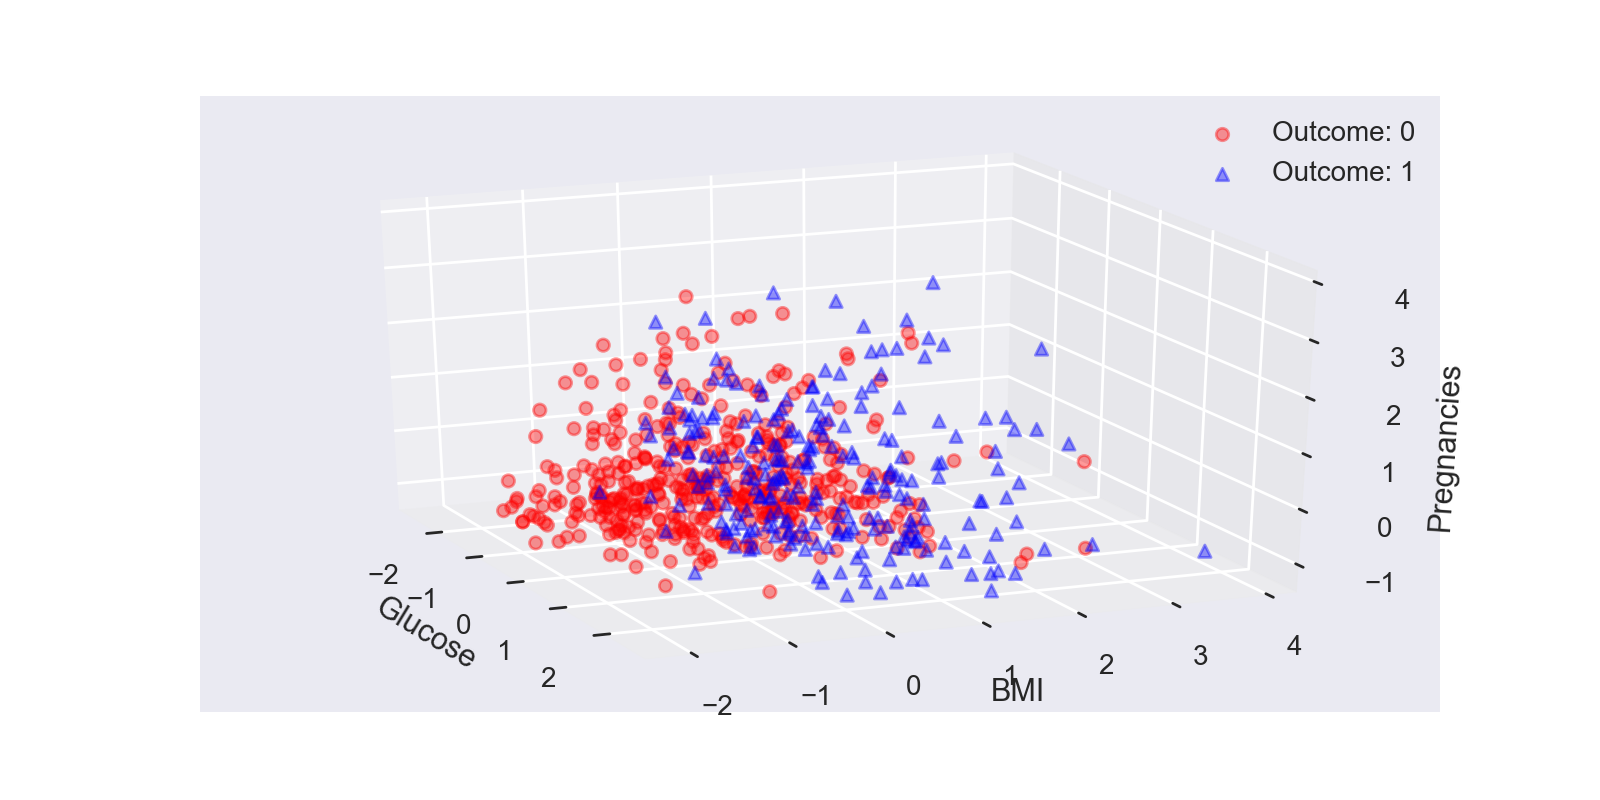

In [42]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = (8.0, 4.0)
ax = plt.axes(projection='3d')
for color, i, t, mark in zip(['red', 'blue'], [0, 1], d3_test.values,['o','^']):
    ax.scatter(d3_train.values[d3_test.values == i,0], d3_train.values[d3_test.values == i,1], 
                d3_train.values[d3_test.values == i,2], color = color, lw = 1, alpha = 0.4, label= "Outcome: " + str(i)
              ,marker = mark)
ax.legend(loc='best', scatterpoints=1)
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')


By eye it does look like a better seperation than the 2-dimensional PCA, but nowhere near perfect.


# Moving on

Lets move on by trying to establish a baseline for the problem and decide on which version of the dataset to use.
The work continues in Notebook Model Selection

Saving the dataset with missing values properly labeled

In [43]:
trainingdata.to_csv('input/Train.csv', index=False)